In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
import re
import string
import pickle

In [2]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
url = "https://factly.in/category/fake-news-kannada/"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(url,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page)
print(soup)

<!DOCTYPE html>
<!--[if IE 8]><html class="ie ie8" lang="en-US"> <![endif]--><!--[if IE 9]><html class="ie ie9" lang="en-US"> <![endif]--><!--[if gt IE 9]><!--><html lang="en-US"> <!--<![endif]--><head><meta content="1521487944736293" property="fb:pages"/><meta charset="utf-8"/><link href="//2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/cache/autoptimize/css/autoptimize_13c79b10e1ce4fe63d9d69db60977d67.css" media="all" rel="stylesheet"/><title>Fake News - Kannada Archives - FACTLY</title><meta content="width=device-width, initial-scale=1" name="viewport"/><link href="https://factly.in/xmlrpc.php" rel="pingback"/><link href="https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads/2014/12/factly_fb_profile_pic_1-e1418541763655.png" rel="shortcut icon"/><link href="https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads/2015/01/factly-144x144.png" rel="apple-touch-icon-precomposed"/> <!-- This site is optimized with the Yoast SEO plugi

In [3]:
print(soup.prettify()[:10000])

<!DOCTYPE html>
<!--[if IE 8]><html class="ie ie8" lang="en-US"> <![endif]-->
<!--[if IE 9]><html class="ie ie9" lang="en-US"> <![endif]-->
<!--[if gt IE 9]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta content="1521487944736293" property="fb:pages"/>
  <meta charset="utf-8"/>
  <link href="//2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/cache/autoptimize/css/autoptimize_13c79b10e1ce4fe63d9d69db60977d67.css" media="all" rel="stylesheet"/>
  <title>
   Fake News - Kannada Archives - FACTLY
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://factly.in/xmlrpc.php" rel="pingback"/>
  <link href="https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads/2014/12/factly_fb_profile_pic_1-e1418541763655.png" rel="shortcut icon"/>
  <link href="https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads/2015/01/factly-144x144.png" rel="apple-touch-icon-precomposed"/>
  <!-- This sit

In [4]:
soup_title= soup.findAll("a",{"class":"image-link"})
len(soup_title)

11

In [5]:
soup_title

[<a class="image-link" href="https://factly.in/review-supreme-court-notes-that-membership-of-five-or-more-is-an-essential-condition-for-unlawful-assembly/" title="Review: Supreme Court notes that membership of five or more is an essential condition for unlawful assembly"> <img alt="" class="image wp-post-image" height="221" sizes="(max-width: 351px) 100vw, 351px" src="https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads//2022/01/directions-to-CBSE_image-351x221.jpg" srcset="https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads/2022/01/directions-to-CBSE_image-351x221.jpg 351w, https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads/2022/01/directions-to-CBSE_image-103x65.jpg 103w, https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads/2022/01/directions-to-CBSE_image-343x215.jpg 343w, https://2nafqn3o0l6kwfofi3ydj9li-wpengine.netdna-ssl.com/wp-content/uploads/2022/01/directions-to-CBSE_image-326x205.j

In [6]:
type(soup_title)

bs4.element.ResultSet

In [7]:
for x in range(len(soup_title)):
    print(soup_title[x]['title'])

Review: Supreme Court notes that membership of five or more is an essential condition for unlawful assembly
ಕುದುರೆ ಕೂದಲು ಹುಳುವಿನ ವೀಡಿಯೋವನ್ನು ಶಿವ ನಾಗ ಮರದ ಬೇರು ಎಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ
ನಿಮ್ಮ ಫೋನ್ ಅನ್ನು ಚಾರ್ಜ್ ಮಾಡುತ್ತಿರುವಾಗ ಮಾತನಾಡಿದರೆ ಸ್ಪೋಟಗೊಳ್ಳುತ್ತದೆ ಎಂಬುದು ನಿಜವಾಗಿ ನಡೆದ ಘಟನೆ ಅಲ್ಲ
ಬಿಜೆಪಿ ಶಾಸಕ ರಾಜಾಸಿಂಗ್‌ರವರನ್ನು ಪೊಲೀಸರು ಬಂಧಿಸಿದ ಹಳೆಯ ವಿಡಿಯೋವನ್ನು ಇತ್ತೀಚಿಗಿನ ಪ್ರಕರಣ ಎಂದು ತಪ್ಪುದಾರಿಗೆಳೆಯುತ್ತಿದ್ದಾರೆ
ಶಿವಲಿಂಗಕ್ಕೆ ಹಾಲು ಹಾಕುವುದನ್ನು ನಿಲ್ಲಿಸಬೇಕು ಎಂಬ ಅಮೀರ್ ಖಾನ್ ಹೇಳಿಕೆಗೆ ಪ್ರತಿಯಾಗಿ ಮುಸ್ಲಿಮರು ಗೋರಿಗಳ ಮೇಲೆ ಚಾದರ್ ಹಾಕುವುದನ್ನು ನಿಲ್ಲಿಸಬೇಕು ಎಂದು ಪಾಯಲ್ ರೋಹಟ್ಗಿ ಹೇಳಿಕೆ ನೀಡಿಲ್ಲ
ಕಳ್ಳತನಕ್ಕೆ ಸಂಬಂಧಿಸಿದ ವೀಡಿಯೊವನ್ನು ತಿರುಪತಿ ದೇವಸ್ಥಾನ ಸಮಿತಿ ಸದಸ್ಯನ (TTD) ಮನೆಗೆ IT ದಾಳಿ ಎಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗುತ್ತಿದೆ
ವಿಮಾನ ನಿಲ್ದಾಣದಲ್ಲಿ ಸಾರ್ವಜನಿಕವಾಗಿ ಮೂತ್ರ ವಿಸರ್ಜನೆ ಮಾಡಿದ್ದಕ್ಕಾಗಿ ಬಂಧಿಸಿದ್ದು ಆರ್ಯನ್ ಖಾನ್‌ರನ್ನು ಅಲ್ಲ, ಬದಲಿಗೆ ಟ್ವಿಲೈಟ್ ನಟ ಬ್ರಾನ್ಸನ್ ಪೆಲ್ಲೆಟಿಯರ್ ರನ್ನು
ಹಳೆದ ಸಂಬಂಧವಿಲ್ಲದ ಫೋಟೊವನ್ನು ತಪ್ಪಾಗಿ ಕರ್ನಾಲ್ ವೈದ್ಯ ಸಗಣಿ ತಿಂದಿದ್ದಕ್ಕೆ ಆಸ್ಪತ್ರೆಗೆ ದಾಖಲಾಗಿದ್ದಾರೆ ಎಂದು  ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ
ರಾಜ್ಯದಲ್ಲಿ ರಸ್ತೆ ಅಗಲೀಕರಣದ ಸಮಯದಲ್ಲಿ ಕೆಡವಿದ ಮಸೀದಿಯ ಕೆಳಗೆ ಹಿಂದೂ ದೇವಾಲಯ ಸಿ

In [8]:
import bs4
from bs4 import BeautifulSoup
import requests
import pandas
from pandas import DataFrame
import csv

In [9]:
#command to create a structure of csv file in which we will populate our scraped data
with open('fake_kannada.csv', mode='w') as csv_file:
    fieldnames = ['Title']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
#Creating an empty lists of variables
article_title = []

In [10]:
def opencodezscraping(url, page_number):
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page)
    next_page = url + str(page_number)
    response= requests.get(str(next_page))
    soup_title= soup.findAll("a",{"class":"image-link"})
    for x in range(len(soup_title)):
        article_title.append(soup_title[x]['title'])
    if page_number < 30:
        page_number = page_number + 1
        opencodezscraping(url, page_number)
opencodezscraping('https://factly.in/category/fake-news-kannada/', 0)

In [11]:
data = {'text_name':article_title}
df = DataFrame(data, columns = ['text_name'])
df.to_csv(r'E:\isfcr project\fake_kannada.csv')

In [12]:
import pandas as pd
df_fake = pd.read_csv(r'E:\isfcr project\fake_kannada.csv')

In [13]:
pd.set_option('display.max_colwidth', None)

In [14]:
df_fake

,Unnamed: 0,text_name
0,0,Review: Supreme Court notes that membership of five or more is an essential condition for unlawful assembly
1,1,ಕುದುರೆ ಕೂದಲು ಹುಳುವಿನ ವೀಡಿಯೋವನ್ನು ಶಿವ ನಾಗ ಮರದ ಬೇರು ಎಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ
2,2,ನಿಮ್ಮ ಫೋನ್ ಅನ್ನು ಚಾರ್ಜ್ ಮಾಡುತ್ತಿರುವಾಗ ಮಾತನಾಡಿದರೆ ಸ್ಪೋಟಗೊಳ್ಳುತ್ತದೆ ಎಂಬುದು ನಿಜವಾಗಿ ನಡೆದ ಘಟನೆ ಅಲ್ಲ
3,3,ಬಿಜೆಪಿ ಶಾಸಕ ರಾಜಾಸಿಂಗ್‌ರವರನ್ನು ಪೊಲೀಸರು ಬಂಧಿಸಿದ ಹಳೆಯ ವಿಡಿಯೋವನ್ನು ಇತ್ತೀಚಿಗಿನ ಪ್ರಕರಣ ಎಂದು ತಪ್ಪುದಾರಿಗೆಳೆಯುತ್ತಿದ್ದಾರೆ
4,4,ಶಿವಲಿಂಗಕ್ಕೆ ಹಾಲು ಹಾಕುವುದನ್ನು ನಿಲ್ಲಿಸಬೇಕು ಎಂಬ ಅಮೀರ್ ಖಾನ್ ಹೇಳಿಕೆಗೆ ಪ್ರತಿಯಾಗಿ ಮುಸ್ಲಿಮರು ಗೋರಿಗಳ ಮೇಲೆ ಚಾದರ್ ಹಾಕುವುದನ್ನು ನಿಲ್ಲಿಸಬೇಕು ಎಂದು ಪಾಯಲ್ ರೋಹಟ್ಗಿ ಹೇಳಿಕೆ ನೀಡಿಲ್ಲ
...,...,...
336,336,"ವಿಮಾನ ನಿಲ್ದಾಣದಲ್ಲಿ ಸಾರ್ವಜನಿಕವಾಗಿ ಮೂತ್ರ ವಿಸರ್ಜನೆ ಮಾಡಿದ್ದಕ್ಕಾಗಿ ಬಂಧಿಸಿದ್ದು ಆರ್ಯನ್ ಖಾನ್‌ರನ್ನು ಅಲ್ಲ, ಬದಲಿಗೆ ಟ್ವಿಲೈಟ್ ನಟ ಬ್ರಾನ್ಸನ್ ಪೆಲ್ಲೆಟಿಯರ್ ರನ್ನು"
337,337,ಹಳೆದ ಸಂಬಂಧವಿಲ್ಲದ ಫೋಟೊವನ್ನು ತಪ್ಪಾಗಿ ಕರ್ನಾಲ್ ವೈದ್ಯ ಸಗಣಿ ತಿಂದಿದ್ದಕ್ಕೆ ಆಸ್ಪತ್ರೆಗೆ ದಾಖಲಾಗಿದ್ದಾರೆ ಎಂದು ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ
338,338,ರಾಜ್ಯದಲ್ಲಿ ರಸ್ತೆ ಅಗಲೀಕರಣದ ಸಮಯದಲ್ಲಿ ಕೆಡವಿದ ಮಸೀದಿಯ ಕೆಳಗೆ ಹಿಂದೂ ದೇವಾಲಯ ಸಿಕ್ಕಿರಲಿಲ್ಲ
339,339,ಟಿ.ವಿ. ವಾಹಿನಿ ಸಂಪಾದಕ ಮಾತನಾಡಿದ್ದನ್ನು ಕಾಂಗ್ರೆಸ್ ವಕ್ತಾರ ಮೋದಿ ಹೊಗಳಿದ್ದಾರೆಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ


In [15]:
df_fake.shape

(341, 2)

<!DOCTYPE html>
<html lang="en"><head><title>Dailyhunt</title><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="#ffffff" id="themeColor" name="theme-color"/><link href="/assets/manifest.json?mode=pwa" rel="manifest"/><meta content="yes" name="mobile-web-app-capable"/><link href="/assets/img/icon.png?mode=pwa" rel="icon" sizes="192x192"/> <meta content="DH" name="apple-mobile-web-app-title"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="black" name="apple-mobile-web-app-status-bar-style"/><link href="/assets/img/apple-touch-icon-72x72.png?mode=pwa" rel="apple-touch-icon" sizes="72x72"/><link href="/assets/img/apple-touch-icon-114x114.png?mode=pwa" rel="apple-touch-icon" sizes="114x114"/><link href="/assets/img/apple-touch-icon-57x57.png?mode=pwa" rel="apple-touch-icon"/><link href="/assets/img/splash-startup.png?mode=pwa" rel="apple-touch-startup-image"/><meta content="Dailyh
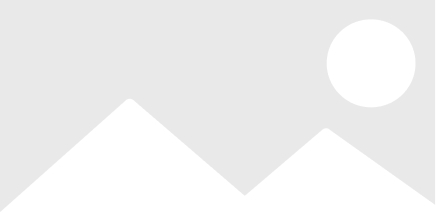
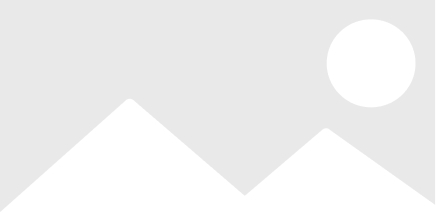
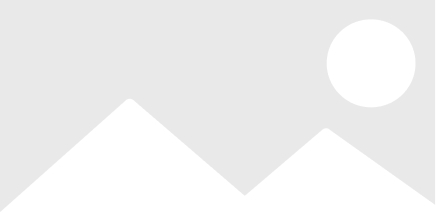
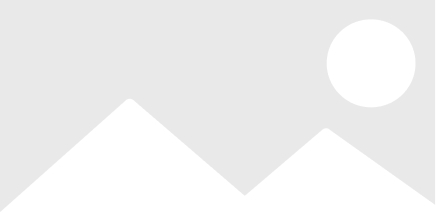
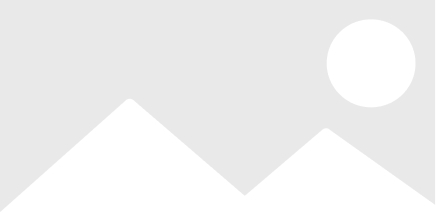
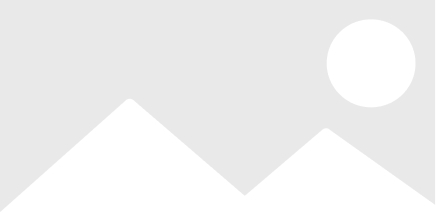
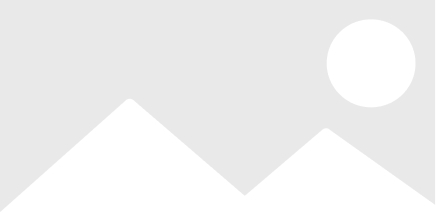
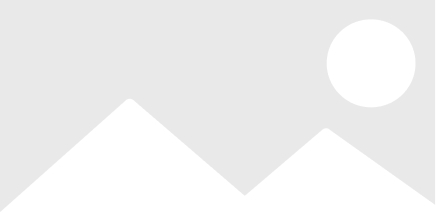
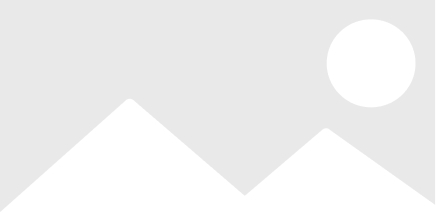
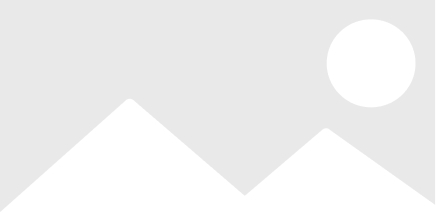
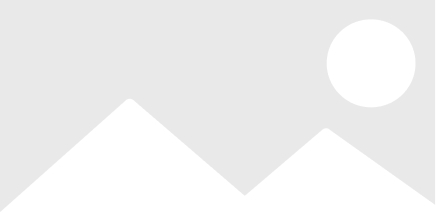
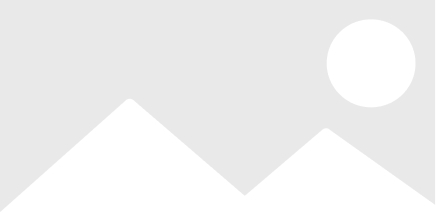
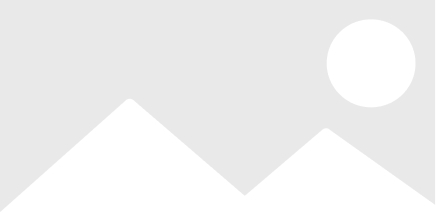

In [16]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
url = "https://m.dailyhunt.in/news/india/kannada/news+kannada-epaper-newskan/pramukhasuddi-updates-pramukhasuddi?mode=pwa&action=click"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(url,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page)
print(soup)

In [17]:
print(soup.prettify()[:10000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Dailyhunt
  </title>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="#ffffff" id="themeColor" name="theme-color"/>
  <link href="/assets/manifest.json?mode=pwa" rel="manifest"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <link href="/assets/img/icon.png?mode=pwa" rel="icon" sizes="192x192"/>
  <meta content="DH" name="apple-mobile-web-app-title"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <link href="/assets/img/apple-touch-icon-72x72.png?mode=pwa" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/assets/img/apple-touch-icon-114x114.png?mode=pwa" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/assets/img/apple-touch-icon-57x57.png?mode=pwa" rel="apple-touch-icon"/>
  <link href="/assets/img/splash-startup.png?mode=pwa" rel=

In [18]:
soup_title= soup.findAll("figcaption",{"class":"sc-eqIVtm dZfTok rtl"})
len(soup_title)

3

In [19]:
soup_title

[<figcaption class="sc-eqIVtm dZfTok rtl"><a href="/news/india/kannada/newskannada-epaper-newskan/kerala+76+omikraan+prakarana+daakhalu-newsid-n349670812?listname=newspaperLanding&amp;topic=pramukhasuddi&amp;index=0&amp;topicIndex=0&amp;mode=pwa&amp;action=click" title="ಕೇರಳ: 76 ಒಮಿಕ್ರಾನ್ ಪ್ರಕರಣ ದಾಖಲು"><h2>ಕೇರಳ: 76 ಒಮಿಕ್ರಾನ್ ಪ್ರಕರಣ ದಾಖಲು</h2></a></figcaption>,
 <figcaption class="sc-eqIVtm dZfTok rtl"><a href="/news/india/kannada/newskannada-epaper-newskan/koronaadindha+ketaring+udyamakke+dodda+etu+raajagopaal+rai-newsid-n349650492?listname=newspaperLanding&amp;topic=pramukhasuddi&amp;index=1&amp;topicIndex=0&amp;mode=pwa&amp;action=click" title="ಕೊರೋನಾದಿಂದ ಕೇಟರಿಂಗ್ ಉದ್ಯಮಕ್ಕೆ ದೊಡ್ಡ ಏಟು: ರಾಜಗೋಪಾಲ್ ರೈ"><h2>ಕೊರೋನಾದಿಂದ ಕೇಟರಿಂಗ್ ಉದ್ಯಮಕ್ಕೆ ದೊಡ್ಡ ಏಟು: ರಾಜಗೋಪಾಲ್ ರೈ</h2></a></figcaption>,
 <figcaption class="sc-eqIVtm dZfTok rtl"><a href="/news/india/kannada/newskannada-epaper-newskan/dhaaravaada+naaleyindha+1+rindha+8ne+taragatige+raje+ghoshisi+jillaadhikaari+aadesha-newsid-n349650490?listname

In [20]:
#command to create a structure of csv file in which we will populate our scraped data
with open('true_kannada.csv', mode='w') as csv_file:
    fieldnames = ['Title']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
#Creating an empty lists of variables
article_title = []

In [21]:
def opencodezscraping(url, page_number):
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page)
    next_page = url + str(page_number)
    response= requests.get(str(next_page))
    soup_title= soup.findAll("figcaption",{"class":"sc-eqIVtm dZfTok rtl"})
    for x in range(len(soup_title)):
        article_title.append(soup_title[x].a['title'])
    if page_number < 20:
        page_number = page_number + 1
        opencodezscraping(url, page_number)
opencodezscraping('https://m.dailyhunt.in/news/india/kannada/news+kannada-epaper-newskan/pramukhasuddi-updates-pramukhasuddi?mode=pwa&action=click', 0)

In [22]:
data = {'text_name':article_title}
df = DataFrame(data, columns = ['text_name'])
df.to_csv(r'E:\isfcr project\true_kannada.csv')

In [23]:
df_true = pd.read_csv(r'E:\isfcr project\true_kannada.csv')

In [24]:
pd.set_option('display.max_colwidth', None)

In [25]:
df_true

,Unnamed: 0,text_name
0,0,ಕೇರಳ: 76 ಒಮಿಕ್ರಾನ್ ಪ್ರಕರಣ ದಾಖಲು
1,1,ಕೊರೋನಾದಿಂದ ಕೇಟರಿಂಗ್ ಉದ್ಯಮಕ್ಕೆ ದೊಡ್ಡ ಏಟು: ರಾಜಗೋಪಾಲ್ ರೈ
2,2,"ಧಾರವಾಡ: ನಾಳೆಯಿಂದ 1 ರಿಂದ 8ನೇ ತರಗತಿಗೆ ರಜೆ ಘೋಷಿಸಿ, ಜಿಲ್ಲಾಧಿಕಾರಿ ಆದೇಶ"
3,3,ಕೇರಳ: 76 ಒಮಿಕ್ರಾನ್ ಪ್ರಕರಣ ದಾಖಲು
4,4,ಕೊರೋನಾದಿಂದ ಕೇಟರಿಂಗ್ ಉದ್ಯಮಕ್ಕೆ ದೊಡ್ಡ ಏಟು: ರಾಜಗೋಪಾಲ್ ರೈ
...,...,...
58,58,ಕೊರೋನಾದಿಂದ ಕೇಟರಿಂಗ್ ಉದ್ಯಮಕ್ಕೆ ದೊಡ್ಡ ಏಟು: ರಾಜಗೋಪಾಲ್ ರೈ
59,59,"ಧಾರವಾಡ: ನಾಳೆಯಿಂದ 1 ರಿಂದ 8ನೇ ತರಗತಿಗೆ ರಜೆ ಘೋಷಿಸಿ, ಜಿಲ್ಲಾಧಿಕಾರಿ ಆದೇಶ"
60,60,ಕೇರಳ: 76 ಒಮಿಕ್ರಾನ್ ಪ್ರಕರಣ ದಾಖಲು
61,61,ಕೊರೋನಾದಿಂದ ಕೇಟರಿಂಗ್ ಉದ್ಯಮಕ್ಕೆ ದೊಡ್ಡ ಏಟು: ರಾಜಗೋಪಾಲ್ ರೈ


In [26]:
df_true1 = pd.read_csv("E:\\isfcr project\\true1_kannada.csv")
df_true2 = pd.read_csv("E:\\isfcr project\\true2_kannada.csv")
df_true3 = pd.read_csv("E:\\isfcr project\\true3_kannada.csv")

In [27]:
pd.set_option('display.max_colwidth', None)

In [28]:
df_true1 = df_true1.drop(['text_url'], axis = 1)
df_true2 = df_true2.drop(['text_url'], axis = 1)
df_true3 = df_true3.drop(['text_url'], axis = 1)

In [29]:
df_true1.head(10)

,text_name
0,ಮೇಕೆದಾಟು ಪಾದಯಾತ್ರೆ ಆರಂಭ; ಕೋವಿಡ್ ನಿಯಮಗಳು ಗಾಳಿಗೆ
1,ಉಡುಪಿ ಪರ್ಯಾಯಕ್ಕೆ ಸರ್ಕಾರದ ಕೊರೊನಾ ನಿಯಮ ಅಡ್ಡಿ
2,ಡಿಸ್ಕೌಂಟ್‌ನಲ್ಲಿ ವಿವೋ ಫೋನ್ ಖರೀದಿ ಮಾಡಬೇಕೆ?..ಹಾಗಿದ್ರೆ ಈ ಆಫರ್ ಗಮನಿಸಿ!
3,ಕರ್ನಾಟಕದ ಕೋವಿಡ್ ವಾರ್ ರೂಮ್‌ಗೆ ರಾಷ್ಟ್ರಪ್ರಶಸ್ತಿ
4,ಉತ್ತರ ಕನ್ನಡ; ಶಿರಸಿ ಮಾರಿಕಾಂಬ ಜಾತ್ರೆಗೆ ದಿನಾಂಕ ನಿಗದಿ
5,"ಭಾರತ ನನ್ನ ಔಟ್ ಮಾಡಬೇಕಾದ್ರೆ, ನಂದು ಯಾವುದಾದ್ರೂ ಮೂಳೆ ಮುರೀಬೇಕು!"
6,ಸಾವಿನ ರಸ್ತೆ ಕುಖ್ಯಾತಿಯ ಹುಬ್ಬಳ್ಳಿ-ಧಾರವಾಡ ಬೈಪಸ್ ಅಗಲೀಕರಣ
7,ಪಂತ್ ಬಾಯಲ್ಲಿ ಬ್ಯಾಟ್ ಬೀಸೋದನ್ನು ಬಿಡ್ಬೇಕು!!! ಬೇಕಿತ್ತಾ ಪಂತ್...
8,"ಜ.9ರಿಂದ ಜ.14ರ ವಾರ ಭವಿಷ್ಯ- ಯಾರಿಗೆಲ್ಲಾ ಅದೃಷ್ಟ ಇದೆ, ರಾಶಿಫಲದಲ್ಲಿ ಏನೆಲ್ಲಾ ಬದಲಾವಣೆ ಇದೆ?"
9,Explained: ಪಂಚರಾಜ್ಯಗಳಿಗೆ ಏಳು ಹಂತಗಳಲ್ಲಿ ಚುನಾವಣೆ


In [30]:
df_true2.head(10)

,text_name
0,NaN
1,NaN
2,Kodagu: ಮಾಂತ್ರಿಕರ ಮಾತು ಕೇಳಿ ನಿಧಿಗಾಗಿ ಮನೆಯನ್ನೆಲ್ಲಾ ಅಗೆದ ಯುವಕ.. ಆದರೆ ಸಿಕ್ಕಿದ್ದು ಇದೇ ನೋಡಿ..
3,NaN
4,NaN
5,"4000 ಕಮ್ಯುನಿಟಿ ಹೆಲ್ತ್​ ಆಫೀಸರ್ ಹುದ್ದೆಗಳಿಗೆ ಅರ್ಜಿ ಆಹ್ವಾನ, ಮಾಸಿಕ ವೇತನ ₹ 35,000"
6,NaN
7,NaN
8,Relationship Tips: ನಿಮ್ಮ ಕ್ರಶ್ ಹೀಗೆ ಮೆಸೇಜ್ ಮಾಡ್ತಿದ್ರೆ ಅವರಿಂದ ದೂರ ಇರೋದು ಬೆಸ್ಟ್
9,NaN


In [31]:
df_true3.head(10)

,text_name
0,"ಕನಕಪುರ ಸಂಗಮದಲ್ಲಿ ಮೇಕೆದಾಟು ಯೋಜನೆ ಪಾದಯಾತ್ರೆಗೆ ಚಾಲನೆ: ಸರ್ವಧರ್ಮ ಗುರುಗಳು ಭಾಗಿ, ಆರಂಭದಲ್ಲಿಯೇ ಕೋವಿಡ್ ನಿಯಮ ಉಲ್ಲಂಘನೆ!"
1,ಮೇಕೆದಾಟು ಪಾದಯಾತ್ರೆ: ಬೆಂಗಳೂರು ತನಕ ನಡೆದೇ ನಡೆಯುತ್ತೇವೆ- ಸಿದ್ದರಾಮಯ್ಯ
2,"'ಕಾಂಗ್ರೆಸ್ 5 ವರ್ಷ ಅಧಿಕಾರದಲ್ಲಿದ್ದರೂ ಡಿಪಿಆರ್ ನ್ನು ಸಲ್ಲಿಸಲಾಗಿಲ್ಲ, ಮೇಕೆದಾಟು ಪಾದಯಾತ್ರೆ ರಾಜಕೀಯ ಪ್ರೇರಿತ: ಸಿಎಂ ಬೊಮ್ಮಾಯಿ"
3,"'ಮೇಕೆ'ದಾಟಲು ಕ್ಷಣಗಣನೆ, ಕಾಂಗ್ರೆಸ್ ನಾಯಕರ ಪಣ, ಸಂಗಮದಲ್ಲಿ ಡಿ ಕೆ ಶಿವಕುಮಾರ್ ಪೂಜೆ ಸಲ್ಲಿಕೆ"
4,ಮೇಕೆದಾಟು ಪಾದಯಾತ್ರೆ: ಜವಾಬ್ದಾರಿಯುತವಾಗಿ ನಡೆದುಕೊಳ್ಳಿ- ಕಾಂಗ್ರೆಸ್ ನಾಯಕರಿಗೆ ರಾಜ್ಯದ ಸಚಿವರು
5,ಮೇಕೆದಾಟು ಪಾದಯಾತ್ರೆ: ಕಾಂಗ್ರೆಸ್ ನಾಯಕರು ನಾಡಿನ ಜನತೆಯ ಕ್ಷಮೆ ಕೇಳಬೇಕು- ಆರಗ ಜ್ಞಾನೇಂದ್ರ
6,"'ಕಾಂಗ್ರೆಸ್ 5 ವರ್ಷ ಅಧಿಕಾರದಲ್ಲಿದ್ದರೂ ಡಿಪಿಆರ್ ನ್ನು ಸಲ್ಲಿಸಲಾಗಿಲ್ಲ, ಮೇಕೆದಾಟು ಪಾದಯಾತ್ರೆ ರಾಜಕೀಯ ಪ್ರೇರಿತ: ಸಿಎಂ ಬೊಮ್ಮಾಯಿ"
7,ಸುಳ್ಳು ಜಾಹೀರಾತು ನೀಡುವ ಮೂಲಕ ಸರ್ಕಾರ ಜನರಿಗೆ ಮೇಕೆದಾಟು ಯೋಜನೆ ವಿಚಾರದಲ್ಲಿ ತಪ್ಪು ಮಾಹಿತಿ ನೀಡುತ್ತಿದೆ: ಸಿದ್ದರಾಮಯ್ಯ ಆಕ್ರೋಶ
8,"ನಮ್ಮ ಹೋರಾಟ ಕಾವೇರಿ ನೀರಿಗಾಗಿ, ಜನರ ಉಳಿವಿಗಾಗಿ: ಡಿ ಕೆ ಶಿವಕುಮಾರ್"
9,"ಭೀಕರ ವಿಡಿಯೋ: ಜಾಲಿ ಮೂಡ್ ನಲ್ಲಿ ಬೋಟಿಂಗ್ ಮಾಡುತ್ತಿದ್ದ ಬೋಟ್ ಗಳ ಮೇಲೆ ಬಿದ್ದ ಬೃಹತ್ ಬಂಡೆ, 7 ಸಾವು, 20 ಮಂದಿ ನಾಪತ್ತೆ; ವಿಡಿಯೋ ವೈರಲ್"


In [32]:
df_true1.shape, df_true2.shape, df_true3.shape

((60, 1), (195, 1), (137, 1))

In [33]:
df_true1 = df_true1.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_true2 = df_true2.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_true3 = df_true3.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)

In [34]:
df_true1.shape, df_true2.shape, df_true3.shape

((58, 1), (23, 1), (118, 1))

In [35]:
df_merge_true = pd.concat([df_true1, df_true2, df_true3,df_true], axis = 0)

In [36]:
df_merge_true["real/fake"] = "Real"

In [37]:
df_merge_true.shape

(262, 3)

In [38]:
df_merge_true = df_merge_true.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)

In [39]:
df_merge_true.tail(10)

,text_name,Unnamed: 0,real/fake
192,ಗುಣಮಟ್ಟಕ್ಕೆ ಹೆಸರುವಾಸಿಯಾದ ಗೋಲ್ಡ್ ವಿನ್ನರ್ ಈಗ ಎಲ್ಡಿಯಾ ಶುದ್ಧ ಕೊಬ್ಬರಿ ಎಣ್ಣೆಯನ್ನು ತನ್ನ ಸಮೂಹಕ್ಕೆ ಸ್ವಾಗತಿಸುತ್ತಿದೆ,NaN,Real
193,ಉತ್ತಮ ನಿದ್ರೆಯ ಪ್ರಾಮುಖ್ಯತೆ ಸಾರಲು ರೆಸ್‏ಮೆಡ್ ನಿಂದ #WakeUpToGoodSleep ಕ್ಯಾಂಪೇನ್,NaN,Real
194,ಅಮೆರಿಕದ ಐಷಾರಾಮಿ ಹೋಟೆಲ್ ಖರೀದಿಸಿದ ಉದ್ಯಮಿ ಮುಖೇಶ್ ಅಂಬಾನಿ!,NaN,Real
195,ನೋ ಬಾಲ್ ಅಲ್ಲ.. ವೈಡ್ ಬಾಲ್ ಅಲ್ವೇ ಅಲ್ಲ; ಫೀಲ್ಡರ್ ಗಳ ಎಡವಟ್ಟಿಗೆ 7 ರನ್ ಚಚ್ಚಿಸಿಕೊಂಡ ಬೌಲರ್; ವಿಡಿಯೋ ವೈರಲ್,NaN,Real
196,ಟೆಸ್ಟ್ ನಲ್ಲಿ ವಿಶ್ವ ದಾಖಲೆ ನಿರ್ಮಿಸಿದ ನ್ಯೂಜಿಲೆಂಡ್ ಆಟಗಾರ ಡೆವೂನ್ ಕಾನ್ವೇ,NaN,Real
197,ವಿಟ್ಲ: ಕೊರಗಜ್ಜನ ವೇಷ ಧರಿಸಿ ಕುಣಿದ ಮುಸ್ಲಿಂ ಮದುಮಗ; ಪೊಲೀಸರಿಂದ ಪ್ರಕರಣ ದಾಖಲು,NaN,Real
198,"ಭೀಕರ ವಿಡಿಯೋ: ಜಾಲಿ ಮೂಡ್ ನಲ್ಲಿ ಬೋಟಿಂಗ್ ಮಾಡುತ್ತಿದ್ದ ಬೋಟ್ ಗಳ ಮೇಲೆ ಬಿದ್ದ ಬೃಹತ್ ಬಂಡೆ, 7 ಸಾವು, 20 ಮಂದಿ ನಾಪತ್ತೆ; ವಿಡಿಯೋ ವೈರಲ್",NaN,Real
199,ಕೇರಳ: 76 ಒಮಿಕ್ರಾನ್ ಪ್ರಕರಣ ದಾಖಲು,60.0,Real
200,ಕೊರೋನಾದಿಂದ ಕೇಟರಿಂಗ್ ಉದ್ಯಮಕ್ಕೆ ದೊಡ್ಡ ಏಟು: ರಾಜಗೋಪಾಲ್ ರೈ,61.0,Real
201,"ಧಾರವಾಡ: ನಾಳೆಯಿಂದ 1 ರಿಂದ 8ನೇ ತರಗತಿಗೆ ರಜೆ ಘೋಷಿಸಿ, ಜಿಲ್ಲಾಧಿಕಾರಿ ಆದೇಶ",62.0,Real


In [40]:
df_merge_true.shape

(202, 3)

In [41]:
df_fake1 = pd.read_csv("E:\\isfcr project\\fake1_kannada.csv")
df_fake2 = pd.read_csv("E:\\isfcr project\\fake2_kannada.csv")
df_fake3 = pd.read_csv("E:\\isfcr project\\fake3_kannada.csv")
df_fake4 = pd.read_csv("E:\\isfcr project\\fake4_kannada.csv")
df_fake5 = pd.read_csv("E:\\isfcr project\\fake5_kannada.csv")
df_fake6 = pd.read_csv("E:\\isfcr project\\fake6_kannada.csv")
df_fake7 = pd.read_csv("E:\\isfcr project\\fake7_kannada.csv")
df_fake8 = pd.read_csv("E:\\isfcr project\\fake8_kannada.csv")

In [42]:
df_fake1 = df_fake1.drop(['text_url'], axis = 1)
df_fake2 = df_fake2.drop(['text_url'], axis = 1)
df_fake3 = df_fake3.drop(['text_url'], axis = 1)
df_fake4 = df_fake4.drop(['text_url'], axis = 1)
df_fake5 = df_fake5.drop(['text_url'], axis = 1)
df_fake6 = df_fake6.drop(['text_url'], axis = 1)
df_fake7 = df_fake7.drop(['text_url'], axis = 1)
df_fake8 = df_fake8.drop(['text_url'], axis = 1)

In [43]:
df_fake1.head(10)

,text_name
0,ಕುದುರೆ ಕೂದಲು ಹುಳುವಿನ ವೀಡಿಯೋವನ್ನು ಶಿವ ನಾಗ ಮರದ ಬೇರು ಎಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ
1,ನಿಮ್ಮ ಫೋನ್ ಅನ್ನು ಚಾರ್ಜ್ ಮಾಡುತ್ತಿರುವಾಗ ಮಾತನಾಡಿದರೆ ಸ್ಪೋಟಗೊಳ್ಳುತ್ತದೆ ಎಂಬುದು ನಿಜವಾಗಿ ನಡೆದ ಘಟನೆ ಅಲ್ಲ
2,ಬಿಜೆಪಿ ಶಾಸಕ ರಾಜಾಸಿಂಗ್‌ರವರನ್ನು ಪೊಲೀಸರು ಬಂಧಿಸಿದ ಹಳೆಯ ವಿಡಿಯೋವನ್ನು ಇತ್ತೀಚಿಗಿನ ಪ್ರಕರಣ ಎಂದು ತಪ್ಪುದಾರಿಗೆಳೆಯುತ್ತಿದ್ದಾರೆ
3,ಶಿವಲಿಂಗಕ್ಕೆ ಹಾಲು ಹಾಕುವುದನ್ನು ನಿಲ್ಲಿಸಬೇಕು ಎಂಬ ಅಮೀರ್ ಖಾನ್ ಹೇಳಿಕೆಗೆ ಪ್ರತಿಯಾಗಿ ಮುಸ್ಲಿಮರು ಗೋರಿಗಳ ಮೇಲೆ ಚಾದರ್ ಹಾಕುವುದನ್ನು ನಿಲ್ಲಿಸಬೇಕು ಎಂದು ಪಾಯಲ್ ರೋಹಟ್ಗಿ ಹೇಳಿಕೆ ನೀಡಿಲ್ಲ
4,ಕಳ್ಳತನಕ್ಕೆ ಸಂಬಂಧಿಸಿದ ವೀಡಿಯೊವನ್ನು ತಿರುಪತಿ ದೇವಸ್ಥಾನ ಸಮಿತಿ ಸದಸ್ಯನ (TTD) ಮನೆಗೆ IT ದಾಳಿ ಎಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗುತ್ತಿದೆ
5,"ವಿಮಾನ ನಿಲ್ದಾಣದಲ್ಲಿ ಸಾರ್ವಜನಿಕವಾಗಿ ಮೂತ್ರ ವಿಸರ್ಜನೆ ಮಾಡಿದ್ದಕ್ಕಾಗಿ ಬಂಧಿಸಿದ್ದು ಆರ್ಯನ್ ಖಾನ್‌ರನ್ನು ಅಲ್ಲ, ಬದಲಿಗೆ ಟ್ವಿಲೈಟ್ ನಟ ಬ್ರಾನ್ಸನ್ ಪೆಲ್ಲೆಟಿಯರ್ ರನ್ನು"
6,ಹಳೆದ ಸಂಬಂಧವಿಲ್ಲದ ಫೋಟೊವನ್ನು ತಪ್ಪಾಗಿ ಕರ್ನಾಲ್ ವೈದ್ಯ ಸಗಣಿ ತಿಂದಿದ್ದಕ್ಕೆ ಆಸ್ಪತ್ರೆಗೆ ದಾಖಲಾಗಿದ್ದಾರೆ ಎಂದು ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ
7,ರಾಜ್ಯದಲ್ಲಿ ರಸ್ತೆ ಅಗಲೀಕರಣದ ಸಮಯದಲ್ಲಿ ಕೆಡವಿದ ಮಸೀದಿಯ ಕೆಳಗೆ ಹಿಂದೂ ದೇವಾಲಯ ಸಿಕ್ಕಿರಲಿಲ್ಲ
8,ಟಿ.ವಿ. ವಾಹಿನಿ ಸಂಪಾದಕ ಮಾತನಾಡಿದ್ದನ್ನು ಕಾಂಗ್ರೆಸ್ ವಕ್ತಾರ ಮೋದಿ ಹೊಗಳಿದ್ದಾರೆಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ
9,ಗರ್ಭಿಣಿ ಮಹಿಳೆಗೆ ಸೈನಿಕರು ಸಹಾಯ ಮಾಡುತ್ತಿರುವ ವಿಡಿಯೋ ನೈಜ ಘಟನೆಯಲ್ಲ


In [44]:
df_fake2.tail(10)

,text_name
27,New Zealand vs Bangladesh
28,NaN
29,NaN
30,NaN
31,Kodagu: ಮಾಂತ್ರಿಕರ ಮಾತು ಕೇಳಿ ನಿಧಿಗಾಗಿ ಮನೆಯನ್ನೆಲ್ಲಾ ಅಗೆದ ಯುವಕ.. ಆದರೆ ಸಿಕ್ಕಿದ್ದು ಇದೇ ನೋಡಿ..
32,"4000 ಕಮ್ಯುನಿಟಿ ಹೆಲ್ತ್​ ಆಫೀಸರ್ ಹುದ್ದೆಗಳಿಗೆ ಅರ್ಜಿ ಆಹ್ವಾನ, ಮಾಸಿಕ ವೇತನ ₹ 35,000"
33,Relationship Tips: ನಿಮ್ಮ ಕ್ರಶ್ ಹೀಗೆ ಮೆಸೇಜ್ ಮಾಡ್ತಿದ್ರೆ ಅವರಿಂದ ದೂರ ಇರೋದು ಬೆಸ್ಟ್
34,Evening Digest: ಪೂಜೆ ವೇಳೆ ಆಯ ತಪ್ಪಿದ ಡಿಕೆಶಿ; ಪತ್ನಿಯರನ್ನು ಹಂಚಿಕೊಳ್ಳುತ್ತಿದ್ದ ಜಾಲ ಬಯಲು
35,ಊಫ್​​... ಇಷ್ಟು ಹಾಟ್​ ಫೋಟೋ ನೋಡಿದ್ರೆ ಅಷ್ಟೇ... ದಿಶಾ ಸಾಕು ಈ ಆಟ ಅಂತಿದ್ದಾರೆ ಫ್ಯಾನ್ಸ್​!
36,This genius checkout trick can drop your Target total instantly Capital One Shopping


In [45]:
df_fake3.head(10)

,text_name
0,"ಲಸಿಕೆ ಹಾಕಿದ ಜಾಂಬಿ, ಲೈಂಗಿಕ ವಿರೋಧಿ ಬೆಡ್‌!, ಇಲ್ಲಿದೆ 2021 ರ ಸುಳ್ಳು ಸುದ್ದಿಗಳು"
1,ಸಾಮಾಜಿಕ ಜಾಲತಾಣದಲ್ಲಿ ಹರಿದಾಡುತ್ತಿರುವ ವೇಳಾಪಟ್ಟಿ ನಕಲಿ: ಸಿಬಿಎಸ್‌ಇ ಸ್ಪಷ್ಟನೆ
2,Breaking News: ಕಾಶ್ಮೀರದಲ್ಲಿ ವಲಸೆ ಕಾರ್ಮಿಕರನ್ನು ಸೇನಾ ಶಿಬಿರಕ್ಕೆ ಸ್ಥಳಾಂತರಿಸುವ ಆದೇಶ ನಕಲಿ
3,"Fact Check: 'ಈಶ್ವರ ಅಲ್ಲಾಹ್‌ ತೆರೋ ನಾಮ್‌' ಬದಲಿಗೆ 'ಜೈ ಶ್ರೀರಾಮ್‌'?, ವಿಡಿಯೋ ಹಿಂದಿನ ಸತ್ಯ"
4,ಸುಳ್ಳುಗಳನ್ನು ಬಹಿರಂಗ ಪಡಿಸುವುದು 'ಬುದ್ಧಿ ಜೀವಿ' ಗಳ ಕರ್ತವ್ಯ: ಸುಪ್ರೀಂ ನ್ಯಾಯಮೂರ್ತಿ
5,Fact Check: ಭಾರತೀಯ ರೈಲ್ವೆ 10 ಹೊಸ ನಿಯಮ ಜಾರಿ ಮಾಡಿದೆಯೇ?
6,ದ್ವಿತೀಯ ಪಿಯುಸಿ ಪರೀಕ್ಷೆ ಬಗ್ಗೆ ಸಂದೇಶ ವೈರಲ್‌- ಡಿಸಿಎಂ ಅಶ್ವತ್ಥನಾರಾಯಣ ಸ್ಪಷ್ಟನೆ
7,Fact Check: ನೀಟ್-ಸ್ನಾತಕೋತ್ತರ ಪರೀಕ್ಷೆ ಮುಂದೂಡಿಕೆ?
8,ಖಾಸಗಿ ಆಸ್ಪತ್ರೆಗಳಲ್ಲಿ ಕೋವಿಡ್ ಲಸಿಕೆಗೆ ದರ ಎಷ್ಟು? ತಪ್ಪು ಮಾಹಿತಿ ಬಗ್ಗೆ ಸರ್ಕಾರದ ಸ್ಪಷ್ಟನೆ
9,ಸಾಮಾಜಿಕ ಜಾಲತಾಣ ನಿಯಂತ್ರಣಕ್ಕೆ ಕೇಂದ್ರದ ಹೊಸ ಮಾರ್ಗಸೂಚಿ


In [46]:
df_fake4.head(10)

,text_name
0,ಎಲ್ಲ
1,ನ್ಯೂಸ್
2,ಫೋಟೋ
3,ವಿಡಿಯೋ
4,ನನ್ನ ತಟ್ಟೆಯಲ್ಲಿರುವ ಅನ್ನವನ್ನು ಒದೆಯುವ ಕೆಲಸ ಮಾಡಬೇಡಿ: ವಿನೋದ್ ಪ್ರಭಾಕರ್ ನೋವಿನ ಮಾತು
5,FACT CHECK: ಪರೀಕ್ಷೆ ಮುಂದೂಡದ್ದಕ್ಕೆ ತೆಲಂಗಾಣ ಬಾಲಕಿ ಆತ್ಮಹತ್ಯೆ ಸುದ್ದಿ – ಇದರ ಅಸಲಿಯತ್ತೇನು?
6,Fact check: ಜಿಂಕೆ ಎಂದುಕೊಂಡು ವ್ಯಕ್ತಿಗೆ ತಗುಲಿದ ಗುರಿ? ಇಲ್ಲಿದೆ ಸತ್ಯಾಸತ್ಯತೆ!
7,Fake News: ಆಫ್ರಿಕಾದ ಮಹಿಳೆ ಏಕಕಾಲಕ್ಕೆ 10 ಮಕ್ಕಳಿಗೆ ಜನ್ಮ ನೀಡಿದ್ದು ಸುಳ್ಳು ಸುದ್ದಿ: ತನಿಖೆಯಿಂದ ಬಯಲ
8,"ಗೆಳತಿ ಬಾರ್ಬರಾಗೆ ನಕಲಿ ವಜ್ರದುಂಗುರ ತೊಡಿಸಿದ್ದನಂತೆ ಚೋಕ್ಸಿ, ಏನೇನು ಹೇಳಿ ಯಾಮಾರಿಸಿದ್ದ ಗೊತ್ತಾ?"
9,Facebook fake account: 5 ನಿಮಿಷದಲ್ಲಿ ಫೇಸ್​ಬುಕ್ ನಕಲಿ ಖಾತೆಯನ್ನು ಡಿಲೀಟ್ ಮಾಡಿಸಲು ಹೀಗೆ ಮಾಡಿ!


In [47]:
df_fake5.head(10)

,text_name
0,ಎಲ್ಲ
1,ನ್ಯೂಸ್
2,ಫೋಟೋ
3,ವಿಡಿಯೋ
4,ಇಶ್ರತ್​ ಜಹಾನ್​ ನಕಲಿ ಎನ್​ಕೌಂಟರ್​ ಪ್ರಕರಣ; ಮೂವರು ಪೊಲೀಸರನ್ನು ಬಿಡುಗಡೆಗೊಳಿಸಿದ ಸಿಬಿಐ ಕೋರ್ಟ್​
5,ಸಾಮಾಜಿಕ ಜಾಲತಾಣಗಳಲ್ಲಿ ಫೇಕ್‌ ನ್ಯೂಸ್‌ ತಡೆಯುವುದು ಹೇಗೆ?
6,ಕೊರೋನಾ ಲಸಿಕೆ ಬಗ್ಗೆ ಸುಳ್ಳುಸುದ್ದಿ ಹಬ್ಬಿಸಿದವರ ವಿರುದ್ಧ ಕಠಿಣ ಕಾನೂನು ಕ್ರಮಕ್ಕೆ ಕೇಂದ್ರ ಸೂಚನೆ
7,ವೈದ್ಯರಿಗೆ ಬ್ಲಾಕ್​ಮೇಲ್; ಪತ್ರಕರ್ತೆಯರು ಎಂದು ಹೇಳಿಕೊಂಡಿದ್ದ ಮೂವರು ಯುವತಿಯರ ಬಂಧನ
8,ನಕಲಿ ನೋಟು ಜಾಲ ಬಗೆದಷ್ಟು ಆಳ: ಮನೆಯಲ್ಲೇ ನಕಲಿ ನೋಟು ತಯಾರಿಸುತ್ತಿದ್ದ ಆರೋಪಿಗಳು ಅಂದರ್
9,"3 ವರ್ಷದಿಂದ ಸಗಣಿ ಎತ್ತಿಕೊಂಡು ಜೀವನ ಮಾಡುತ್ತಿದ್ದೇನೆ, ಸುಳ್ಳುಸುದ್ದಿ ಹಬ್ಬಿಸಬೇಡಿ; ವರ್ತೂರು ಪ್ರಕಾಶ್"


In [48]:
df_fake6.head(10)

,text_name
0,ಎಲ್ಲ
1,ನ್ಯೂಸ್
2,ಫೋಟೋ
3,ವಿಡಿಯೋ
4,ಬದುಕಿದ್ದಾಗಲೇ ತನ್ನ ಸಾವಿನ ಸುದ್ದಿ ಓದಿದ ಸ್ಯಾಂಡಲ್​ವುಡ್ ನಟಿ ಗರಂ
5,Fact Check | ಜೂನ್ 15ರಿಂದ ದೇಶಾದ್ಯಂತ ಮತ್ತೆ ಕಟ್ಟುನಿಟ್ಟಿನ ಲಾಕ್​ಡೌನ್ ಜಾರಿ ಸುದ್ದಿ ನಿಜವೇ?
6,ಹಾಸನದಲ್ಲಿ ಸೆಂಚುರಿ ದಾಟಿದ ಕೊರೋನಾ ಸುಳ್ಳು ಸುದ್ದಿ ಹಬ್ಬಿಸಿದವರ ವಿರುದ್ದ ಕೇಸ್ ದಾಖಲು
7,FAKE – ಕಾರ್ಮಿಕರಿಗೆ ಸರ್ಕಾರದಿಂದ 1.2 ಲಕ್ಷ ಸಿಗುತ್ತೆ ಎಂಬ ಮೆಸೇಜ್ ಬಂದ್ರೆ ಹುಷಾರ್
8,Fake: ಜೂಮ್​ ಆ್ಯಪ್​ಗೆ​ ಪರ್ಯಾಯವಾಗಿ ಸರ್ಕಾರ ಅಭಿವೃದ್ಧಿ ಪಡಿಸಿದ ಸ್ವದೇಶಿ ಆ್ಯಪ್​​ ಇದೇನಾ?
9,ಒಂದೇ ಸಮುದಾಯ ಟಾರ್ಗೆಟ್ - ಸುಳ್ಳು ಸುದ್ದಿ ಹಬ್ಬಿಸುವವರ ವಿರುದ್ಧ ಕೇಸ್ ಹಾಕಿ ; ಸಿ.ಎಂ.ಇಬ್ರಾಹಿಂ


In [49]:
df_fake7.head(10)

,text_name
0,ಎಲ್ಲ
1,ನ್ಯೂಸ್
2,ಫೋಟೋ
3,ವಿಡಿಯೋ
4,ಶಾಸಕರ ಹೆಸರಲ್ಲಿ ಮಸೀದಿಗಳನ್ನು ತಲುಪುತ್ತಿವೆ ನಕಲಿ ಪತ್ರಗಳು; ಪೊಲೀಸರಿಂದ ತನಿಖೆ
5,ಈ ವರ್ಷ ಭಾರೀ ಸದ್ದು ಮಾಡಿತ್ತು ಟೀಂ ಇಂಡಿಯಾ ಸ್ಟಾರ್ ಕ್ರಿಕೆಟಿಗನ ಸಾವಿನ ಸುದ್ದಿ!
6,1
7,2
8,3
9,4


In [50]:
df_fake8.head(10)

,text_name
0,Fact ಚೆಕ್: ನಟಿ ಸನಾ ಖಾನ್ ಹನಿಮೂನ್ ಫೋಟೋ ಹರಿಬಿಟ್ಟರಾ ಆಕೆಯ ಮೌಲ್ವಿ ಪತಿ..?
1,Fact ಚೆಕ್: ಕೃಷಿ ಕಾಯ್ದೆ ಹಾಗೂ ಪ್ರಧಾನಿ ಮೋದಿಗೆ ಸಿಖ್ ಕುಟುಂಬದ ಬೆಂಬಲ..?
2,ರೈತ ಪ್ರತಿಭಟನೆ ಬೆನ್ನಲ್ಲೇ ಮುಖೇಶ್ ಅಂಬಾನಿ ಜೊತೆ ಪಂಜಾಬ್ ಸಿಎಂ ಮಾತುಕತೆ..?
3,ಮೋದಿ ಜೊತೆ ಹಸ್ತಲಾಘವ ಮಾಡಿದ್ದಕ್ಕೆ ನಾಚಿಕೆಯಾಗ್ತಿದೆ ಎಂದಿದ್ದರಾ ಒಬಾಮಾ..?!
4,ಕೃಷಿ ಕಾಯ್ದೆ ವಿರೋಧಿಸಿ ಸಿಖ್‌ ರೈತರ ಜೊತೆ ಪ್ರತಿಭಟನೆ ಕುಳಿತಿದ್ರಾ ಕೆನಡಾ ಪ್ರಧಾನಿ..?
5,ಭಾರತದ ಬಡತನ ಬಿಂಬಿಸಲು ಬಾಂಗ್ಲಾ ದೇಶದ ಫೋಟೋ ಬಳಸಿದ್ದ ಕಾಂಗ್ರೆಸ್..!
6,ದಿಲ್ಲಿ ರೈತ ಪ್ರತಿಭಟನೆಗೆ ಸಾಥ್ ನೀಡಲು ಸಾವಿರಾರು ಸಿಖ್ಖರು ಕುದುರೆ ಏರಿ ಬಂದರಾ..?
7,FactCheck: ಪ್ರತಿಭಟಿಸುತ್ತಿರುವ ರೈತರಿಗೆ ಬೆಂಬಲಿಸಿ ಕೇಂದ್ರ ಸರಕಾರದ ವಿರುದ್ಧ ಕಿಡಿಕಾರಿ ಟ್ವೀಟ್‌ ಮಾಡಿದ್ರಾ ಕಮಲಾ ಹ್ಯಾರಿಸ್‌?
8,"ಸರಕಾರ ಅನ್ನದಾತನಿಗೆ ಹೊಡೆಸುತ್ತಿದೆ ಎಂದ ಕಾಂಗ್ರೆಸ್‌ ನಾಯಕರು, ಫೋಟೊ ಹಿಂದಿನ ಅಸಲಿ ಸತ್ಯವೇನು? ಪೆಟ್ಟು ಬಿದ್ದಿಲ್ಲ!"
9,Fact Check: ಹೈದರಾಬಾದ್ ಚುನಾವಣೆಯಲ್ಲಿ ಬಿಜೆಪಿ ಜೊತೆ ಓವೈಸಿ ಪಕ್ಷ ರಹಸ್ಯ ಮೈತ್ರಿ..?


In [51]:
df_fake1.shape, df_fake2.shape, df_fake3.shape, df_fake4.shape, df_fake5.shape, df_fake6.shape, df_fake7.shape, df_fake8.shape

((10, 1), (37, 1), (20, 1), (35, 1), (35, 1), (35, 1), (22, 1), (12, 1))

In [52]:
df_fake1 = df_fake1.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_fake2 = df_fake2.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_fake3 = df_fake3.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_fake4 = df_fake4.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_fake5 = df_fake5.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_fake6 = df_fake6.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_fake7 = df_fake7.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)
df_fake8 = df_fake8.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)

In [53]:
df_fake1.shape, df_fake2.shape, df_fake3.shape, df_fake4.shape, df_fake5.shape, df_fake6.shape, df_fake7.shape, df_fake8.shape

((10, 1), (32, 1), (20, 1), (31, 1), (31, 1), (31, 1), (20, 1), (12, 1))

In [54]:
df_merge_fake = pd.concat([df_fake1, df_fake2, df_fake3, df_fake4, df_fake5, df_fake6, df_fake7, df_fake8,df_fake], axis = 0)

In [55]:
df_merge_fake["real/fake"] = "Fake"

In [56]:
df_merge_fake.shape

(528, 3)

In [57]:
df_merge_fake = df_merge_fake.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)

In [58]:
df_merge_fake.tail(10)

,text_name,Unnamed: 0,real/fake
117,ಕುದುರೆ ಕೂದಲು ಹುಳುವಿನ ವೀಡಿಯೋವನ್ನು ಶಿವ ನಾಗ ಮರದ ಬೇರು ಎಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ,331.0,Fake
118,ನಿಮ್ಮ ಫೋನ್ ಅನ್ನು ಚಾರ್ಜ್ ಮಾಡುತ್ತಿರುವಾಗ ಮಾತನಾಡಿದರೆ ಸ್ಪೋಟಗೊಳ್ಳುತ್ತದೆ ಎಂಬುದು ನಿಜವಾಗಿ ನಡೆದ ಘಟನೆ ಅಲ್ಲ,332.0,Fake
119,ಬಿಜೆಪಿ ಶಾಸಕ ರಾಜಾಸಿಂಗ್‌ರವರನ್ನು ಪೊಲೀಸರು ಬಂಧಿಸಿದ ಹಳೆಯ ವಿಡಿಯೋವನ್ನು ಇತ್ತೀಚಿಗಿನ ಪ್ರಕರಣ ಎಂದು ತಪ್ಪುದಾರಿಗೆಳೆಯುತ್ತಿದ್ದಾರೆ,333.0,Fake
120,ಶಿವಲಿಂಗಕ್ಕೆ ಹಾಲು ಹಾಕುವುದನ್ನು ನಿಲ್ಲಿಸಬೇಕು ಎಂಬ ಅಮೀರ್ ಖಾನ್ ಹೇಳಿಕೆಗೆ ಪ್ರತಿಯಾಗಿ ಮುಸ್ಲಿಮರು ಗೋರಿಗಳ ಮೇಲೆ ಚಾದರ್ ಹಾಕುವುದನ್ನು ನಿಲ್ಲಿಸಬೇಕು ಎಂದು ಪಾಯಲ್ ರೋಹಟ್ಗಿ ಹೇಳಿಕೆ ನೀಡಿಲ್ಲ,334.0,Fake
121,ಕಳ್ಳತನಕ್ಕೆ ಸಂಬಂಧಿಸಿದ ವೀಡಿಯೊವನ್ನು ತಿರುಪತಿ ದೇವಸ್ಥಾನ ಸಮಿತಿ ಸದಸ್ಯನ (TTD) ಮನೆಗೆ IT ದಾಳಿ ಎಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗುತ್ತಿದೆ,335.0,Fake
122,"ವಿಮಾನ ನಿಲ್ದಾಣದಲ್ಲಿ ಸಾರ್ವಜನಿಕವಾಗಿ ಮೂತ್ರ ವಿಸರ್ಜನೆ ಮಾಡಿದ್ದಕ್ಕಾಗಿ ಬಂಧಿಸಿದ್ದು ಆರ್ಯನ್ ಖಾನ್‌ರನ್ನು ಅಲ್ಲ, ಬದಲಿಗೆ ಟ್ವಿಲೈಟ್ ನಟ ಬ್ರಾನ್ಸನ್ ಪೆಲ್ಲೆಟಿಯರ್ ರನ್ನು",336.0,Fake
123,ಹಳೆದ ಸಂಬಂಧವಿಲ್ಲದ ಫೋಟೊವನ್ನು ತಪ್ಪಾಗಿ ಕರ್ನಾಲ್ ವೈದ್ಯ ಸಗಣಿ ತಿಂದಿದ್ದಕ್ಕೆ ಆಸ್ಪತ್ರೆಗೆ ದಾಖಲಾಗಿದ್ದಾರೆ ಎಂದು ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ,337.0,Fake
124,ರಾಜ್ಯದಲ್ಲಿ ರಸ್ತೆ ಅಗಲೀಕರಣದ ಸಮಯದಲ್ಲಿ ಕೆಡವಿದ ಮಸೀದಿಯ ಕೆಳಗೆ ಹಿಂದೂ ದೇವಾಲಯ ಸಿಕ್ಕಿರಲಿಲ್ಲ,338.0,Fake
125,ಟಿ.ವಿ. ವಾಹಿನಿ ಸಂಪಾದಕ ಮಾತನಾಡಿದ್ದನ್ನು ಕಾಂಗ್ರೆಸ್ ವಕ್ತಾರ ಮೋದಿ ಹೊಗಳಿದ್ದಾರೆಂದು ತಪ್ಪಾಗಿ ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ,339.0,Fake
126,ಗರ್ಭಿಣಿ ಮಹಿಳೆಗೆ ಸೈನಿಕರು ಸಹಾಯ ಮಾಡುತ್ತಿರುವ ವಿಡಿಯೋ ನೈಜ ಘಟನೆಯಲ್ಲ,340.0,Fake


In [59]:
df_merge = pd.concat([df_merge_fake, df_merge_true], axis = 0)

In [60]:
df = df_merge.sample(frac = 1)

In [61]:
df.head(10)

,text_name,Unnamed: 0,real/fake
82,"'ಮೇಕೆ'ದಾಟಲು ಕ್ಷಣಗಣನೆ, ಕಾಂಗ್ರೆಸ್ ನಾಯಕರ ಪಣ, ಸಂಗಮದಲ್ಲಿ ಡಿ ಕೆ ಶಿವಕುಮಾರ್ ಪೂಜೆ ಸಲ್ಲಿಕೆ",NaN,Real
38,ಅಡುಗೆ ಅರಮನೆ: ಸಿಂಪಲ್ಲಾಗೊಂದ್ ಅವರೆಕಾಯಿ ಸಾಂಬಾರು ಮಾಡಿ,NaN,Real
76,ಜನತಾ ಕರ್ಫ್ಯೂ ವೇಳೆ ಹೊಡೆದ ಚಪ್ಪಾಳೆಯಿಂದ ಕೊರೋನಾ​ ವೈರಸ್​ ಮಾಯ: ವಾಟ್ಸ್​​ಆ್ಯಪ್​​ ಸಂದೇಶ ಎಷ್ಟು ಸತ್ಯ?,NaN,Fake
100,Kodagu: ಮಾಂತ್ರಿಕರ ಮಾತು ಕೇಳಿ ನಿಧಿಗಾಗಿ ಮನೆಯನ್ನೆಲ್ಲಾ ಅಗೆದ ಯುವಕ.. ಆದರೆ ಸಿಕ್ಕಿದ್ದು ಇದೇ ನೋಡಿ..,NaN,Fake
117,ರಾಜ್ಯದ 77 ಅಧಿಕಾರಿಗಳಿಗೆ ಸಚಿವ ಸಂಪುಟದ ಒಪ್ಪಿಗೆ ಇಲ್ಲದೇ ಬಡ್ತಿ!,NaN,Real
77,Relationship Tips: ನಿಮ್ಮ ಕ್ರಶ್ ಹೀಗೆ ಮೆಸೇಜ್ ಮಾಡ್ತಿದ್ರೆ ಅವರಿಂದ ದೂರ ಇರೋದು ಬೆಸ್ಟ್,NaN,Real
62,ಬೆಂಗಳೂರಿನಲ್ಲಿ ನಕಲಿ ಛಾಪಾ ಕಾಗದ ದಂಧೆ; ಛೋಟಾ ತೆಲಗಿ ಸೇರಿ ನಾಲ್ವರ ಬಂಧನ,NaN,Fake
54,Roundup: ರಾಜ್ಯದ ಇತರೆ ಜಿಲ್ಲೆಗಳಲ್ಲಿ ವಾರಾಂತ್ಯ ಕರ್ಫ್ಯೂ ಹೇಗಿತ್ತು,NaN,Real
137,"ದೆಹಲಿಯಲ್ಲಿ ಇಂದು 20,181 ಕೊರೋನಾ ಪಾಸಿಟಿವ್ ಪ್ರಕರಣಗಳು, ಏಳು ಮಂದಿ ಸಾವು",NaN,Real
165,ಮಸಾಲೆ ಚಟ್ನಿ,NaN,Real


In [62]:
final_df_kannada = df.to_csv("E:\\isfcr project\\final_df_kannada.csv")

In [63]:
 df= df.drop_duplicates(subset = ['text_name'], keep = 'last').reset_index(drop = True)

In [64]:
df.shape

(324, 3)

In [65]:
STOPS_LIST = ['ಈ','ಆದರೆ','ಎಂದು','ಅವರ','ಮತ್ತು','ಎಂಬ','ಅವರು','ಬಗ್ಗೆ','ಆ','ಇದೆ','ಇದು','ನಾನು','ನನ್ನ','ಅದು','ಮೇಲೆ','ಈಗ','ಹಾಗೂ','ಇಲ್ಲ',
'ನನಗೆ','ಅವರಿಗೆ','ತಮ್ಮ','ಮಾಡಿ','ನಮ್ಮ','ಮಾತ್ರ','ದೊಡ್ಡ','ಅದೇ','ಯಾವ','ಆಗ','ತುಂಬಾ','ನಾವು','ದಿನ','ಬೇರೆ','ಅವರನ್ನು','ಎಲ್ಲಾ','ನೀವು',
'ಹೊಸ','ಮುಂದೆ','ಹೇಗೆ','ನಂತರ','ಇಲ್ಲಿ','ಅಲ್ಲ','ಬಳಿಕ','ಹಾಗಾಗಿ','ಒಂದೇ','ಅದನ್ನು','ಬಂದ','ನಿಮ್ಮ','ಇತ್ತು','ಹೇಳಿ','ಮಾಡಿದ','ಅದಕ್ಕೆ','ಆಗಿ',
'ಎಂಬುದು','ಅಂತ','ಕೆಲವು','ಮೊದಲು','ಬಂದು','ಇದೇ','ನೋಡಿ','ಕೇವಲ','ಎರಡು','ಇನ್ನು','ಅಷ್ಟೇ','ಎಷ್ಟು','ಚಿತ್ರದ','ಮಾಡಬೇಕು','ಹೀಗೆ','ಕುರಿತು',
'ಉತ್ತರ','ಎಂದರೆ','ಇನ್ನೂ','ಮತ್ತೆ','ಏನು','ಪಾತ್ರ','ಮುಂದಿನ','ಸಂದರ್ಭದಲ್ಲಿ','ಮಾಡುವ','ವೇಳೆ','ನನ್ನನ್ನು','ಅಥವಾ','ಜೊತೆಗೆ','ಹೆಸರು']


In [66]:
x = df["text_name"]
y = df["real/fake"]

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [69]:
from nltk.tokenize import word_tokenize

word_tokens={}
filtered_sentence = []

for x in x_train:
    x=re.sub("[a-zA-Z]"," ",str(x))
    word_tokens[x] = word_tokenize(x)
    #print(word_tokens[x])
    for i in word_tokens[x]:
        if i in STOPS_LIST:
            word_tokens[x].remove(i)
    print(word_tokens[x])
    
'''from inltk.inltk import tokenize

hindi_text = """ರೈತ ಪ್ರತಿಭಟನೆ ಬೆನ್ನಲ್ಲೇ ಮುಖೇಶ್ ಅಂಬಾನಿ ಜೊತೆ ಪಂಜಾಬ್ ಸಿಎಂ ಮಾತುಕತೆ..?"""

# tokenize(input text, language code)
tokenize(hindi_text, "kn")'''

[':', 'ಕಾಲೇಜುಗಳಲ್ಲಿ', 'ವಿದ್ಯಾರ್ಥಿನಿಯರಿಗೆ', 'ಬಾಯ್\u200cಫ್ರೆಂಡ್', 'ಕಡ್ಡಾಯ', '!']
['ಮೇಕೆದಾಟು', 'ಪಾದಯಾತ್ರೆ', ':', 'ಬೆಂಗಳೂರು', 'ತನಕ', 'ನಡೆದೇ', 'ನಡೆಯುತ್ತೇವೆ-', 'ಸಿದ್ದರಾಮಯ್ಯ']
['ರೈತ', 'ಪ್ರತಿಭಟನೆ', 'ಬೆನ್ನಲ್ಲೇ', 'ಮುಖೇಶ್', 'ಅಂಬಾನಿ', 'ಜೊತೆ', 'ಪಂಜಾಬ್', 'ಸಿಎಂ', 'ಮಾತುಕತೆ', '..', '?']
['ಫೋಟೋಗಳು', ':', 'ಓಮಿಕ್ರಾನ್', 'ನಡುವೆ', 'ಪಾಟ್ನಾ', 'ರೈಲು', 'ನಿಲ್ದಾಣದಲ್ಲಿ', 'ಜನ', 'ನಿರ್ಲಕ್ಷ್ಯ', ',', 'ನಿಲ್ದಾಣದಲ್ಲಿ', 'ಮಾಸ್ಕ್', 'ಧರಿಸದ', 'ಪ್ರಯಾಣಿಕರು', '.']
[':', 'ರಾಜ್ಯದ', 'ಇತರೆ', 'ಜಿಲ್ಲೆಗಳಲ್ಲಿ', 'ವಾರಾಂತ್ಯ', 'ಕರ್ಫ್ಯೂ', 'ಹೇಗಿತ್ತು']
['ಬಿಸ್ಕೆಟ್', 'ಬರ್ಫಿ']
[':', 'ಅದಾನಿಗೆ', 'ಸರ್ಕಾರ', 'ರೈಲ್ವೇಸ್\u200cಅನ್ನು', 'ಮಾರಾಟ', 'ಮಾಡಿಲ್ಲ']
['ಕೊರೋನಾ', 'ಪಾಸಿಟಿವ್', '24', 'ಗಂಟೆಗಳಲ್ಲೇ', 'ಬೆಲ್\u200dಗ್ರೇಡ್\u200d', 'ಕಾರ್ಯಕ್ರಮದಲ್ಲಿ', 'ನೊವಾಕ್', 'ಜೊಕೊವಿಕ್', 'ಭಾಗಿ']
['ಟಿ.ವಿ', '.', 'ವಾಹಿನಿ', 'ಸಂಪಾದಕ', 'ಮಾತನಾಡಿದ್ದನ್ನು', 'ಕಾಂಗ್ರೆಸ್', 'ವಕ್ತಾರ', 'ಮೋದಿ', 'ಹೊಗಳಿದ್ದಾರೆಂದು', 'ತಪ್ಪಾಗಿ', 'ಹಂಚಿಕೊಳ್ಳಲಾಗಿದೆ']
[':', 'ಪೂಜೆ', 'ಆಯ', 'ತಪ್ಪಿದ', 'ಡಿಕೆಶಿ', ';', 'ಪತ್ನಿಯರನ್ನು', 'ಹಂಚಿಕೊಳ್ಳುತ್ತಿದ್ದ', 'ಜಾಲ', 'ಬಯಲು']
['ಕೊರೋನಾ', 'ಅಬ್ಬರ', ':', 'ಮಹಾರಾಷ್ಟ್ರದಲ್ಲಿ', 'ನೈಟ್', 'ಕರ್ಫ್ಯೂ', 'ಜ

'from inltk.inltk import tokenize\n\nhindi_text = """ರೈತ ಪ್ರತಿಭಟನೆ ಬೆನ್ನಲ್ಲೇ ಮುಖೇಶ್ ಅಂಬಾನಿ ಜೊತೆ ಪಂಜಾಬ್ ಸಿಎಂ ಮಾತುಕತೆ..?"""\n\n# tokenize(input text, language code)\ntokenize(hindi_text, "kn")'

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
type(x_train)
#type(word_tokens)

pandas.core.series.Series

In [72]:
tfvect = TfidfVectorizer()
tfid_x_train = tfvect.fit_transform(x_train.values.astype('U'))
tfid_x_test = tfvect.transform(x_test.values.astype('U'))

In [73]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [74]:
#this model remains passive for normal inputs(true) and turns aggressive on different input(fake)
classifier = PassiveAggressiveClassifier(max_iter=50)
#max_iter=maximum number of passes over the training data
classifier.fit(tfid_x_train,y_train)
#fit-taining part of the modelling process

PassiveAggressiveClassifier(max_iter=50)

In [75]:
y_pred = classifier.predict(tfid_x_test)
#accuracy_score -> sklearn
score = accuracy_score(y_test,y_pred)
#accuracy between the predicted and actual values
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 73.85%


In [76]:
cf = confusion_matrix(y_test,y_pred, labels=['Fake','Real'])
print(cf)

[[12  8]
 [ 9 36]]


Text(0.5, 1.0, 'Confusion Matrix for PassiveAggressiveClassifier(Kannada)')

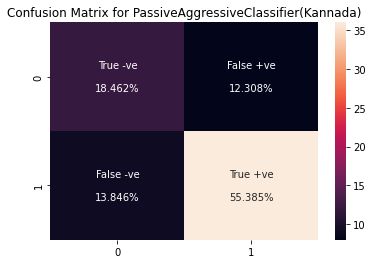

In [77]:
import matplotlib as plt
import seaborn as sns
group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
group_percentages = ["{0:.3%}".format(value) for value in
                    cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n\n{v2}"
          for v1,v2 in
          zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#ax = plt.axes()
ax=sns.heatmap(cf, annot = labels, fmt = '')
ax.set_title('Confusion Matrix for PassiveAggressiveClassifier(Kannada)')

In [78]:
import pickle

#pickle.dump(pac,open('model_1.pkl', 'wb'))-direct method
with open('model_kannada_pac.pkl','wb') as handle:
    pickle.dump(classifier,handle,protocol=pickle.HIGHEST_PROTOCOL)
#handle-file object returned after opening the model
#pickle.HIGHEST_PROTOCOL indicates the highest version of pickle

In [79]:
#Manual Testing
def output_lable(n):
    if n == "Fake":
        return "Fake News"
    elif n == "Real":
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    #creates a dataframe
    new_def_test["text"] = new_def_test["text"]
    new_x_test = new_def_test["text"]
    new_xv_test = tfvect.transform(new_x_test)

    pred_pac = classifier.predict(new_xv_test)
    return print("\n\nPAC Prediction:  ", output_lable(pred_pac[0]))

In [ ]:
news = str(input())
manual_testing(news)